# Exploring IBM HR Employee Attrition Data

#### Author: Keith Miller

### Objective: 

The goal of this analysis is to see if there is a monthly income gender gap and If so does it impact attrition.

### Description

This report will be exploring a fictional dataset created by data scientists for IBM and then uploaded onto Kaggle.com in csv form. It contains 35 columns and 1470 rows that to be studied and compared to see impacts employee attrition. This report will only inspect and compare a few of these variables.


In [1]:
# import the libraries that will be used

import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data to explore variables 

df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/IBM_HR_Analytics.csv')
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


## Summary Statisics

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
# attrition by percentage
Perc_Attr = df['Attrition'].value_counts()/len(df)*100

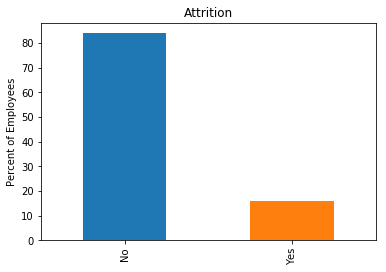

In [5]:
Perc_Attr.plot(kind='bar')
plt.title('Attrition')
plt.ylabel('Percent of Employees')
Perc_Attr
plt.show()

Overall, ~84% of employees stay and ~16% leave. Below the attrition is separated by gender.

In [6]:

Attr_Yes = df[df['Attrition']=="Yes"]
Attr_No = df[df['Attrition']=="No"]
 

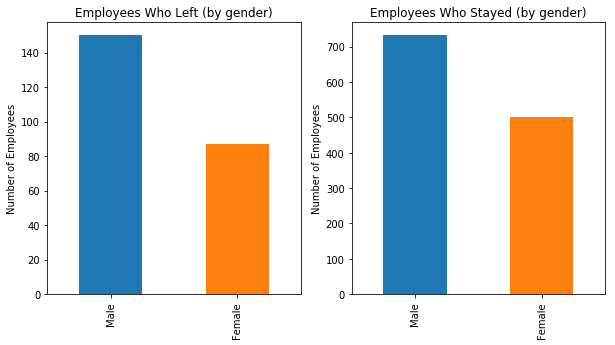

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
Attr_Yes.Gender.value_counts().plot(kind='bar')
plt.title('Employees Who Left (by gender)')
plt.ylabel('Number of Employees')

plt.subplot(1, 2, 2)
Attr_No.Gender.value_counts().plot(kind='bar')
plt.title('Employees Who Stayed (by gender)')
plt.ylabel('Number of Employees')

plt.show()
 

In [8]:
# attriton by percentage of gender
Perc_left = Attr_Yes.Gender.value_counts()/df['Gender'].value_counts()*100
Perc_stayed = Attr_No.Gender.value_counts()/df['Gender'].value_counts()*100

Perc_left

Male      17.006803
Female    14.795918
Name: Gender, dtype: float64

In [9]:
Perc_stayed

Male      82.993197
Female    85.204082
Name: Gender, dtype: float64

Of the Employees who stay ~83% are male and 85% female. Of the emplyees who left ~17% we male and ~15% female.

### What is the age rage that most emplyees leave IBM?

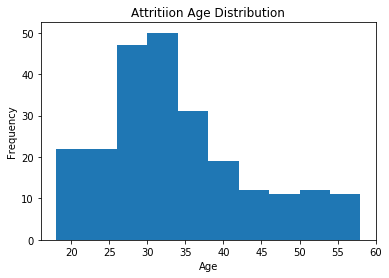

In [10]:
# Age of emplyees who left.
plt.hist(Attr_Yes.Age , bins=10)
plt.title('Attritiion Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


By looking at the age distribution it looks as though the majority of the emplyees who leave are between the ages of 27 and 35. Let's see what the measures of variance and central tendancy say.

In [11]:
print('Statistic Description')
Attr_Yes.Age.describe() 

Statistic Description


count    237.000000
mean      33.607595
std        9.689350
min       18.000000
25%       28.000000
50%       32.000000
75%       39.000000
max       58.000000
Name: Age, dtype: float64

The data is skewed right but should be fine for what we are looking at. Without adjustment the age range for over half of the employees is 23-43. We just want a majority of the emplyees who leave to work with.

In [12]:
# selecting the data for the age range we want to look at.
Total_ageRange = df[(df['Age'] > 23) & (df['Age'] < 43)].sort_values(by='Age')
Attr_ageRange = Attr_Yes[(Attr_Yes['Age'] > 23) & (Attr_Yes['Age'] < 43)].sort_values(by='Age')
Noattr_ageRange = Attr_No[(Attr_No['Age'] > 23) & (Attr_No['Age'] < 43)].sort_values(by='Age')
 

### From the sleceted age range is there a gender income gap?

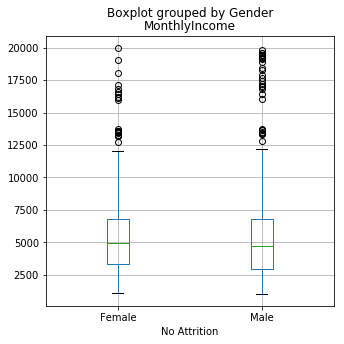

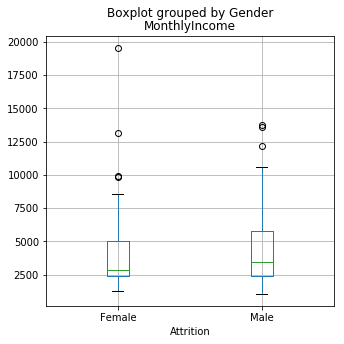

In [13]:
Noattr_ageRange[['Department','MonthlyIncome','Gender']].boxplot(by='Gender', figsize=(5,5))
plt.xlabel('No Attrition')
plt.show
Attr_ageRange[['Department','MonthlyIncome','Gender']].boxplot(by='Gender', figsize=(5,5))
plt.xlabel('Attrition')
plt.show()

From the boxplot it appears that there is a significant gender pay gap within the group with attrition. This is within the age groups that have the largest attrition. 

### Is there more attriton amongst females who are within the largest age group of emplyees who leave than in the whole age range?


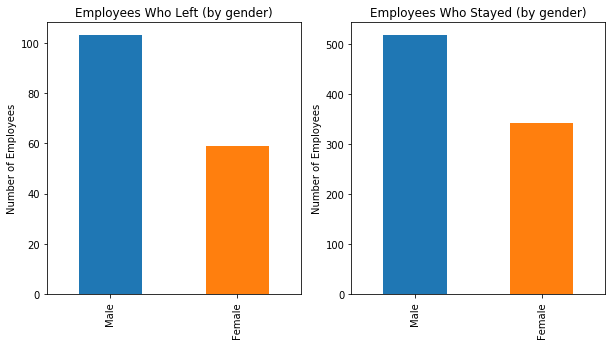

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
Attr_ageRange.Gender.value_counts().plot(kind='bar')
plt.title('Employees Who Left (by gender)')
plt.ylabel('Number of Employees')

plt.subplot(1, 2, 2)
Noattr_ageRange.Gender.value_counts().plot(kind='bar')
plt.title('Employees Who Stayed (by gender)')
plt.ylabel('Number of Employees')

plt.show()

In [15]:
Perc_left_adj = Attr_ageRange.Gender.value_counts()/Total_ageRange.Gender.value_counts()*100
Perc_stayed_adj = Noattr_ageRange.Gender.value_counts()/Total_ageRange.Gender.value_counts()*100

In [16]:
print('Total Percentage of emplyees who stay')
print(Perc_stayed_adj)
print('Percentage of emplyees who stay in the selected age range')
print( Perc_stayed)

Total Percentage of emplyees who stay
Male      83.387097
Female    85.250000
Name: Gender, dtype: float64
Percentage of emplyees who stay in the selected age range
Male      82.993197
Female    85.204082
Name: Gender, dtype: float64


In [17]:
print('Total Percentage of emplyees who stay')
print(Perc_left_adj)
print('Percentage of emplyees who leave in the selected age range')
print( Perc_left)

Total Percentage of emplyees who stay
Male      16.612903
Female    14.750000
Name: Gender, dtype: float64
Percentage of emplyees who leave in the selected age range
Male      17.006803
Female    14.795918
Name: Gender, dtype: float64


Despite the gender gap in the favor of males females in the age range of the highest percentage of employees leaving the company still attrit less than their male counterparts.

### Conclusion

It appears, at leastfor this data set, that wage gap has no affect on attrition. Obviously this is not the entire story.
There is still more categories to inspect, such as, the pay gap when broken down by job level and job departments. There is also more variables to compare when looking at attriion in this data set in general. I would propose samples be taken from several other companies with a similar structure and see how factors affecting IBM compare. 